In [ ]:
# Import bibliotek do zadania
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt



Pobranie zbioru do analizy i jego wizualizacja

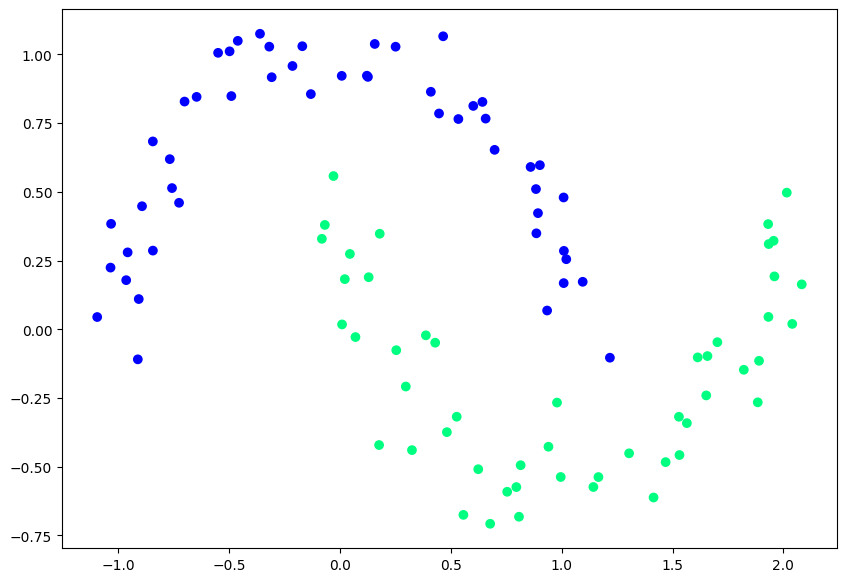

In [ ]:
# pobieranie danych z datasetu o nazwie make_moons
feature_set, labels = datasets.make_moons(100, noise = 0.1)
#feature_set to wspolrzedne punktow
#labels - okreslaja etykiety (co potem reprezentuja kolory) punktow
#visualisation of the dataset for analysis
plt.figure(figsize=(10,7)) #rozmiar figury
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

Podględamy dane w feature_set i labels

In [ ]:
print(feature_set[:5,:])
print(feature_set.shape)

[[ 0.12944715  0.18952414]
 [-1.03486619  0.22448019]
 [-0.49784175  1.01156167]
 [ 0.88573642  0.34925019]
 [ 0.67739821 -0.70779214]]
(100, 2)


In [ ]:
print(labels.shape)
print(labels[:])


(100,)
[0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0
 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1]


Sprawdzamy obliczenia pojedynczego neuronu funkcja aktywacji sigmoid dla pojedynczego punktu danych na wejsciu(wspolrzedne x i y sa na wejsciu neuronu)


In [ ]:
# Wylosowanie poczatkowych wartosci wag i bisau neuronu

#KROK 1 wylosowanie wag i biasu
#tworzy tablice 2 wiersze oraz 1 kolumna
weights = np.random.rand(2,1)*2-1

print(weights)
print('weights shape', weights.shape)

#wartosc bias tez losujemy , rozmiar tablicy 1,1
bias = np.random.rand(1,1)*2-1

print('\n', bias)
print('weights shape', bias.shape)

[[-0.69364843]
 [-0.20472817]]
weights shape (2, 1)

 [[-0.85406356]]
weights shape (1, 1)


In [ ]:
# Wylosowanie poczatkowych wartosci wag i bisau neuronu

#KROK 1 wylosowanie wag i biasu
#tworzy tablice 2 wiersze oraz 1 kolumna
weights = np.random.rand(2,1)*2-1

print(weights)
print('weights shape', weights.shape)

#wartosc bias tez losujemy , rozmiar tablicy 1,1
bias = np.random.rand(1,1)*2-1

print('\n', bias)
print('weights shape', bias.shape)

#na wejscie neurownow wstawiamy wspolrszedne pierwszego punktu z tablicy feature_set
inputs = feature_set[:]
labels = np.reshape(labels, (inputs.shape[0],1))


learning_rate = 0.001
MSE_history = []
for iteration in range(0, 10000):
  #KROK 2 Obliczamy aktualne przewidywania modelu
  #obliczenia jakie sa realizowanie wew neuronu
  XW = np.dot(inputs, weights)
  #print('XW', XW)

  XWB = XW + bias
  #print('XWB', XWB)

  out = sigmoid(XWB)
  #print('out', out)

  # Obliczamy akltualna watosc bledu popelniangeo przez neuronMSE
  mse = 1/inputs.shape[0] * np.sum((out-labels)**2)
  MSE_history.append(mse)

  #KROK 3 Liczymy pochodne po funckj ikosztu
  dJ_dout = out - labels
  dout_dXWB = sigmoid_der(XWB)
  dXWB_dweights = inputs
  dXWB_dbias = 1

  dJ_dweights = np.dot(dXWB_dweights.T , dJ_dout * dout_dXWB)
  Dj_dbias = np.sum(dJ_dout * dout_dXWB) # DXWB_dbias = 1 wiec nie trzeba mnozyc

  #KROK 5 Poprawiamy wagi i bias

  weights = weights - learning_rate * dJ_dweights
  bias = bias - learning_rate * Dj_dbias

[[-0.68888612]
 [-0.59120094]]
weights shape (2, 1)

 [[0.66259532]]
weights shape (1, 1)


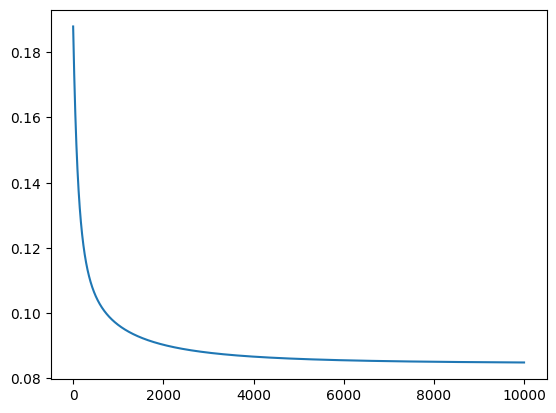

In [ ]:
plt.plot(MSE_history)

In [ ]:
def sigmoid(tablica):
  return 1/(1+np.exp(-tablica))

def sigmoid_der(tablica):
  return sigmoid(tablica)*(1-sigmoid(tablica))

Wyrysowanie


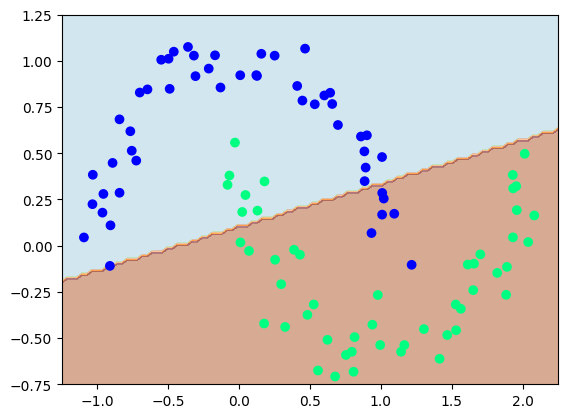

In [ ]:
cmap = plt.get_cmap('Paired')


# Define region of interest by data limits
xmin = -1.25
xmax = 2.25
ymin = -0.75
ymax = 1.25


steps = 100


x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)




# Plot decision boundary in region of interest
z = np.zeros(xx.shape,dtype=int)


ii=0
for i in x_span:
  jj=0
  for j in y_span:

    classification_criteria = 0.5
    #
    out = sigmoid(np.dot(np.array([i,j]),weights) + bias)
    if out > classification_criteria:
    #if i==j :
      z[jj,ii] = 1
    jj=jj+1
  ii=ii+1


fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)


# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)


Dodajemy drugą warstwę neuronów miedzy wejscie a wyjscie



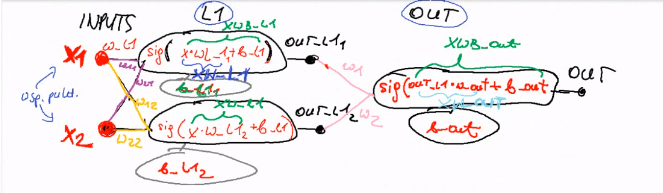

In [ ]:
#KROK 1  musimy wylosowac poczatkowych wartosci wag i bisau neuronu

# losujemy dla warstwy L1 z dwoma neuronami
w_l1 = np.random.rand(2,6)*2-1 # w nawiasach mamy (liczba wag - polaczen do neuronu, liczba neuronow)
b_l1 = np.random.rand(1,6)*2-1 # mamy dwa neurony w warstwie, kazdy ma jeden bias



#tworzy tablice 2 wiersze oraz 1 kolumna
w_out = np.random.rand(6,1)*2-1

print(w_out)
print('w_out shape', w_out.shape)

#wartosc bias tez losujemy , rozmiar tablicy 1,1
b_out = np.random.rand(1,1)*2-1

print('\n', b_out)
print('b_out shape', b_out.shape)



[[-0.51004193]
 [-0.81773107]
 [-0.2625832 ]
 [-0.82216968]
 [ 0.50565756]
 [-0.57842178]]
w_out shape (6, 1)

 [[0.17779113]]
b_out shape (1, 1)


komorka ktora uczy siec 2-warstowowa

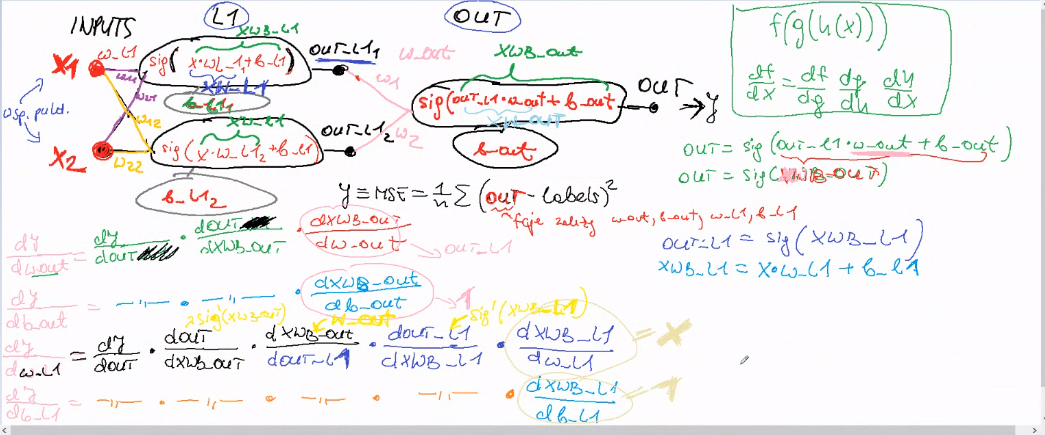

In [ ]:
#na wejscie neurownow wstawiamy wspolrszedne pierwszego punktu z tablicy feature_set
inputs = feature_set
labels = np.reshape(labels, (inputs.shape[0],1))


learning_rate = 0.001
MSE_history = []
for iteration in range(0, 500000):
  #KROK 2 Obliczamy aktualne przewidywania modelu
  #obliczenia jakie sa realizowanie wew neuronu
  #FEEDFORWARD

  # obliczenia w warstwie L1
  XWB_l1 = np.dot(inputs, w_l1) + b_l1
  out_l1 = sigmoid(XWB_l1)

  # obliczenia w warstwie OUT
  XWB_out = np.dot(out_l1, w_out) + b_out
  out = sigmoid(XWB_out)

  # Obliczamy akltualna watosc bledu popelniangeo przez neuronMSE
  mse = 1/inputs.shape[0] * np.sum((out-labels)**2)
  MSE_history.append(mse)

  #KROK 3 Liczymy pochodne po funckj ikosztu

  #warstwa out
  dJ_dout = out - labels
  dout_dXWB_out = sigmoid_der(XWB_out)
  dXWB_out_dw_out = out_l1
  dXWB_out_db_out = 1

  #wartswa l1
  dXWB_out_dout_l1 = w_out
  dout_l1_dXWB_l1 = sigmoid_der(XWB_l1)
  dXWB_l1_dw_l1 = inputs
  dXWB_l1_db_l1 = 1

  dJ_dw_out = np.dot(dXWB_out_dw_out.T , dJ_dout * dout_dXWB_out)
  Dj_db_out= np.sum(dJ_dout * dout_dXWB_out) # DXWB_dbias = 1 wiec nie trzeba mnozyc

  dJ_dw_l1 = np.dot(dXWB_l1_dw_l1.T, np.dot(dJ_dout * dout_dXWB_out, dXWB_out_dout_l1.T) * dout_l1_dXWB_l1)
  dJ_db_l1 = np.sum(np.dot(dJ_dout * dout_dXWB_out, dXWB_out_dout_l1.T) * dout_l1_dXWB_l1, axis=0)

  #dJ_dweights_l1 = np.dot(inputs.T, np.dot(dJ_dout * dout_dXWB, weights_out.T) * sigmoid_der(XWB_l1))
  #dJ_bias_l1 = np.sum(np.dot(dJ_dout * dout_dXWB, weights_out.T) * sigmoid_der(XWB_l1), axis = 0)

  #KROK 4 Poprawiamy wagi i bias

  w_out = w_out - learning_rate * dJ_dw_out
  b_out = b_out - learning_rate * Dj_db_out

  w_l1 = w_l1 - learning_rate * dJ_dw_l1
  b_l1 = b_l1 - learning_rate * dJ_db_l1


Wizualizacja

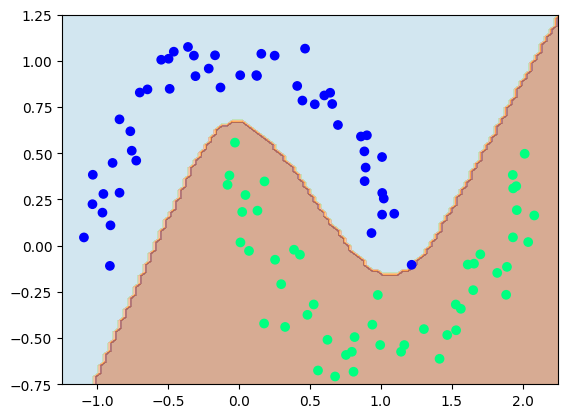

In [ ]:
cmap = plt.get_cmap('Paired')


# Define region of interest by data limits
xmin = -1.25
xmax = 2.25
ymin = -0.75
ymax = 1.25


steps = 100


x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)




# Plot decision boundary in region of interest
z = np.zeros(xx.shape,dtype=int)


ii=0
for i in x_span:
  jj=0
  for j in y_span:

    classification_criteria = 0.5
    #FEEDFORWARD dla wspolrzednych punktu okreslonych np.array([i,j])
    inputs = np.array([i,j])
    XWB_l1 = np.dot(inputs, w_l1) + b_l1
    out_l1 = sigmoid(XWB_l1)

    #obliczenia w warstwie OUT
    XWB_out = np.dot(out_l1, w_out) + b_out
    out = sigmoid(XWB_out)
    if out > classification_criteria:
    #if i==j :
      z[jj,ii] = 1
    jj=jj+1
  ii=ii+1


fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)


# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)